# Описание проекта

Необходимо спрогнозировать уйдёт ли клиент из банка на основе исторических данные о поведении клиентов и расторжении договоров с банком.

## Подготовка данных

In [ ]:
# загрузка библиотек

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.utils import shuffle

In [ ]:
#загрузка данных

data = pd.read_csv('/datasets/Churn.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Признаки


* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата


Целевой признак
* Exited — факт ухода клиента

Предобработка должна включать приведение названий колонок к "змеиному_формату" и обработку пропусков. Пропуски имеются только в колонке Tenure

In [ ]:
data.columns = [x.lower() for x in data.columns]

In [ ]:
data = data.rename(columns = {
    'rownumber':'row_number',
    'customerid':'customer_id',
    'creditscore':'credit_score',
    'numofproducts':'num_of_products',
    'hascrcard':'has_cr_card',
    'isactivemember':'is_active_member',
    'estimatedsalary':'estimated_salary',
    })

In [ ]:
data.head(5)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
data.describe()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Tenure можно перевести в формат int

Большее количество пользователей имеют кредитную карту 70%

Половина пользователей активна 51%

Предполагаемая зарплата имеет подозрительные низкие значения, следует обратить внимание

20% клиентов ушли

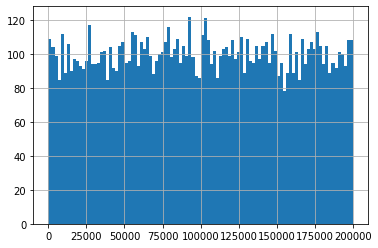

In [ ]:
data['estimated_salary'].hist(bins = 100);

In [ ]:
data['estimated_salary'].sort_values().head(10)

2362     11.58
9647     90.07
9010     91.75
5548     96.27
4989    106.67
7565    123.07
2498    142.81
8722    143.34
4774    178.19
1451    216.27
Name: estimated_salary, dtype: float64

вероятно, проблем со значениями предполагаемой зарплаты нет

In [ ]:
#проверка дубликатов

data[data['customer_id'].duplicated() == True].count()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [ ]:
# имя, номер строки и уникальный номер клиента не влияют на уход клиента

data = data.drop(columns = ['surname', 'row_number', 'customer_id'])

In [ ]:
# пропуски проще убрать из рассмотрения

data = data.dropna()

In [ ]:
# перевод в тип целочисленных значений

data['tenure'] = data['tenure'].astype(int)

## Исследование задачи

### Логистическая регрессия

One Hot Encoder подходит для преобразования категориальных признаков в численные

In [ ]:
one_hot = pd.get_dummies(data[['geography', 'gender']], drop_first=True)
data_ohe = data.join(one_hot).drop(['geography', 'gender'], axis = 1)

In [ ]:
data_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
data_ohe.columns = [x.lower() for x in data_ohe.columns]

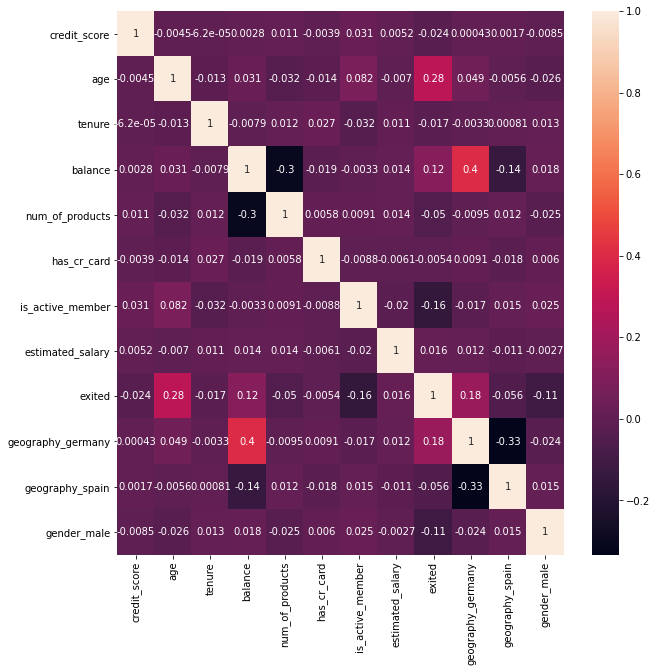

In [ ]:
# анализ взаимосвязи признаков:

corr = data_ohe.corr()

fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot= True,
        ax=ax);

Вывод: признаки независимы и могут быть использованы для построения моделей машинного обучения

Выше было отмечено, что целевой параметр несбалансирован - 20% клиентов ушли, 80% осталось. Для начала следует обучить модель на несбалансированной выборке. При этом в качестве метрики accuracy score не подходит

In [ ]:
#разделение признаков и выборок

features = data_ohe.drop('exited', axis = 1)
target = data_ohe['exited']

features_train, features_valid_and_test, target_train, target_valid_and_test = train_test_split(
    features, target, test_size = 0.4, random_state = 12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_and_test, target_valid_and_test, test_size = 0.5, random_state = 12345)

print("features_train", features_train.shape)
print('target_train', target_train.shape)
print("features_valid", features_valid.shape)
print('target_valid', target_valid.shape)
print("features_test", features_test.shape)
print('target_test', target_test.shape)

features_train (5454, 11)
target_train (5454,)
features_valid (1818, 11)
target_valid (1818,)
features_test (1819, 11)
target_test (1819,)


In [ ]:
#масштабирование количественных признаков

numeric = ['age', 'tenure', 'balance', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_36/3784793748.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_36/3784793748.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
# LogisticRegression

model = LogisticRegression(solver='liblinear', random_state = 12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('confusion_matrix')
print(confusion_matrix(target_valid, predicted_valid))
print('recall_score',recall_score(target_valid, predicted_valid)) #Полнота выявляет, какую долю положительных среди всех ответов выделила модель
print('precision_score', precision_score(target_valid, predicted_valid)) #Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные
print('f1_score',f1_score(target_valid, predicted_valid)) #среднее гармоническое полноты и точности 

confusion_matrix
[[1393   48]
 [ 301   76]]
recall_score 0.20159151193633953
precision_score 0.6129032258064516
f1_score 0.3033932135728543


In [ ]:
# accuracy_score константной модели для сравнения

target_pred_constant = pd.Series(0, index = target.index)

print('accuracy_score', accuracy_score(target, target_pred_constant)) #accuracy_score() принимает на вход верные ответы и предсказания, а возвращает долю правильных ответов

accuracy_score 0.7960620393796062


### Дерево решений

In [ ]:
#DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('confusion_matrix')
print(confusion_matrix(target_valid, predicted_valid))
print('recall_score',recall_score(target_valid, predicted_valid)) #Полнота выявляет, какую долю положительных среди всех ответов выделила модель
print('precision_score', precision_score(target_valid, predicted_valid)) #Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные
print('f1_score',f1_score(target_valid, predicted_valid)) #среднее гармоническое полноты и точности 

confusion_matrix
[[1220  221]
 [ 194  183]]
recall_score 0.4854111405835544
precision_score 0.452970297029703
f1_score 0.4686299615877081


### Случайный лес

In [ ]:
#RandomForestClassifier

f_one = 0
est_list = []
depth_list = []
f_one_list = []
for est in np.arange(90, 110, 1):
    for depth in np.arange(1, 30, 1):
        model = RandomForestClassifier(n_estimators = est, max_depth = depth, random_state=12345)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        est_list.append(est)
        depth_list.append(depth)
        f_one_list.append(f1_score(target_valid, predicted_valid))
        if f1_score(target_valid, predicted_valid) > f_one:
            f_one = f1_score(target_valid, predicted_valid)
            est_best = est
            depth_best = depth
    
print("F1_best", f_one)
print("est_best", est_best)
print("depth_best", depth_best)

F1_best 0.5944170771756978
est_best 93
depth_best 21


Вывод: наивысшее значение метрики F1 получилось при обучении модели случайного леса по сравнению с логистической регрессией и деревом решений. Следовательно, далее следует использовать случайный лес

## Борьба с дисбалансом

### Увеличение и уменьшение выборки

В целевом показателе единиц меньше чем нулей, поэтому чтобы сбалансировать выборку следует либо увеличить количество единиц, либо уменьшить количество нулей

In [ ]:
# увеличение количества единиц

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

model_upsampled = RandomForestClassifier(n_estimators = est_best, max_depth = depth_best, random_state=12345)
model_upsampled.fit(features_upsampled, target_upsampled)
predicted_valid = model_upsampled.predict(features_valid)

print("f1_score:", f1_score(target_valid, predicted_valid))

f1_score: 0.6124260355029586


In [ ]:
# уменьшение количества нулей

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.26)

model_downsampled = RandomForestClassifier(n_estimators = est_best, max_depth = depth_best, random_state=12345)
model_downsampled.fit(features_downsampled, target_downsampled)
predicted_valid = model_downsampled.predict(features_valid)

print("f1_score:", f1_score(target_valid, predicted_valid))

f1_score: 0.5782178217821783


Вывод: увеличение выборки влечёт увеличение метрики F1, следовательно, далее следует использовать увеличенную выборку

In [ ]:
f_one = 0
est_list = []
depth_list = []
f_one_list = []
for est in np.arange(90, 110, 1):
    for depth in np.arange(1, 30, 1):
        model = RandomForestClassifier(n_estimators = est, max_depth = depth, random_state=12345)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        est_list.append(est)
        depth_list.append(depth)
        f_one_list.append(f1_score(target_valid, predicted_valid))
        if f1_score(target_valid, predicted_valid) > f_one:
            f_one = f1_score(target_valid, predicted_valid)
            est_best = est
            depth_best = depth
    
print("F1_best", f_one)
print("est_best", est_best)
print("depth_best", depth_best)

F1_best 0.6437086092715233
est_best 103
depth_best 10


In [ ]:
model_upsampled = RandomForestClassifier(n_estimators = est_best, max_depth = depth_best, random_state=12345)
model_upsampled.fit(features_upsampled, target_upsampled)
predicted_valid = model_upsampled.predict(features_valid)

print("f1_score:", f1_score(target_valid, predicted_valid))

f1_score: 0.6437086092715233


### Изменение порога

In [ ]:
# изменение порога

probabilities_valid = model_upsampled.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1, 0.1):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1 score = {:.3f}".format(
        threshold, precision, recall, f1_score(target_valid, predicted_valid)))

Порог = 0.00 | Точность = 0.207, Полнота = 1.000, f1 score = 0.344
Порог = 0.10 | Точность = 0.252, Полнота = 0.979, f1 score = 0.400
Порог = 0.20 | Точность = 0.329, Полнота = 0.931, f1 score = 0.486
Порог = 0.30 | Точность = 0.417, Полнота = 0.870, f1 score = 0.564
Порог = 0.40 | Точность = 0.502, Полнота = 0.745, f1 score = 0.600
Порог = 0.50 | Точность = 0.643, Полнота = 0.645, f1 score = 0.644
Порог = 0.60 | Точность = 0.730, Полнота = 0.517, f1 score = 0.606
Порог = 0.70 | Точность = 0.817, Полнота = 0.403, f1 score = 0.540
Порог = 0.80 | Точность = 0.908, Полнота = 0.289, f1 score = 0.439
Порог = 0.90 | Точность = 0.907, Полнота = 0.103, f1 score = 0.186


Максимальная точность, полнота и f1 достигается при пороге 0.4

### Исследование метрики AUC ROC

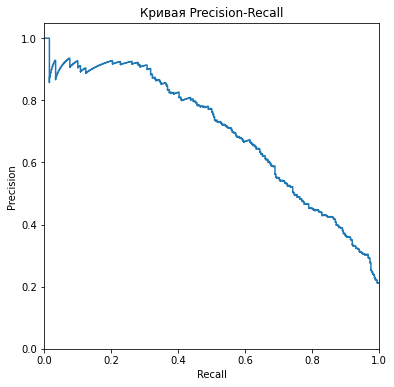

In [ ]:
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

кривая PR на графике достаточно высокая, что отражает хорошее качество модели

In [ ]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("AUC ROC score:", auc_roc)

AUC ROC score: 0.8672451528466268


Значение метрики AUC ROC выше F1 и 0,5 (AUC ROC случайой модели)

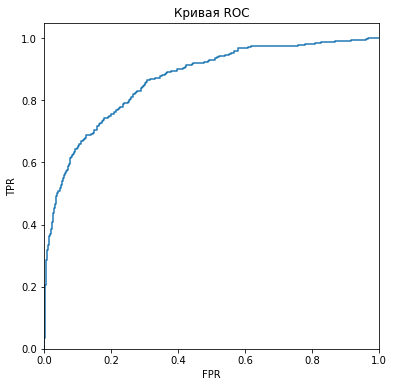

In [ ]:
# построение графика AUC ROC

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure(figsize=(6, 6))
plt.step(fpr, tpr, where='post')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая ROC')
plt.show() 

График достаточно крутой, что отражает хорошее качество модели

## Тестирование модели

In [ ]:
predicted_test = model_upsampled.predict(features_test)

print("f1_score:", f1_score(target_test, predicted_test))

f1_score: 0.6


In [ ]:
probabilities_test = model_upsampled.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print("AUC ROC score:", auc_roc)

AUC ROC score: 0.8566493552869575


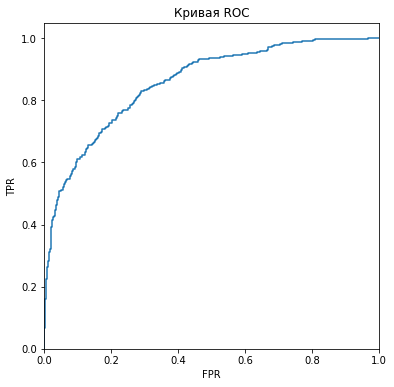

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure(figsize=(6, 6))
plt.step(fpr, tpr, where='post')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая ROC')
plt.show() 

Общий вывод: входные данные подготовлены: оставлены только необходимые параметры, пропуски удалены. Исследование задачи на несбалансированной выборке показало, что модель случайного леса выполняет задачу наилучшим образом. Были подобраны наилучшие гиперпараметры для модели случайного леса методом перебора. Балансировка методом увеличения изначально малочисленной выборки целевого параметра является предпочтительной в связи с высоким значением метрики F1. В итоге построена модель, прогнозирующая уход клиента из банка на основе исторических данных. Модель характеризуется метрикой F1 0.6